In [1]:
data_url = 'https://assets.01-edu.org/ai-branch/project3/emotions-detector.zip'
data_folder_path = '../data/'

In [2]:
downloaded_data_file_name = 'downloaded_data.zip'

In [3]:
unzipped_data_folder_name = 'unzipped_data/'

In [4]:
data_set_names = ['train', 'validate', 'test']

In [5]:
import utils

In [18]:
import pandas

In [24]:
import utils_fer
import numpy

In [7]:
# # case we want all data, with images as byte array and validate set merge with train
# train_data_path, validate_data_path, test_data_path = (
#     utils_fer.saved_facial_emotion_recognition_data_sets_from_url(
#         data_folder_path=data_folder_path,
#         downloaded_data_file_name=downloaded_data_file_name,
#         unzipped_data_folder_name=unzipped_data_folder_name,
#         image_type='png',
#         # image_type='bytes',
#         # sampling=100,
#         merge_training_and_validate=False,
# ))

In [8]:
# skip download step
train_data_path = '../data/train/data.csv'
validate_data_path ='../data/validate/data.csv'
test_data_path ='../data/test/data.csv'

In [9]:
utils.show_folders_and_files(data_folder_path)

../data/
  └ downloaded_data.zip
 train/
  └ data.csv
  images/
   angry/
    ├ 0.png
    ├ 1.png
    ├ 10.png
    ├ ... 3991 files
    └ 28707.png
   fear/
    ├ 2.png
    ├ 5.png
    ├ 9.png
    ├ ... 4093 files
    └ 28704.png
   sad/
    ├ 3.png
    ├ 6.png
    ├ 19.png
    ├ ... 4826 files
    └ 28708.png
   neutral/
    ├ 4.png
    ├ 11.png
    ├ 12.png
    ├ ... 4961 files
    └ 28699.png
   happy/
    ├ 7.png
    ├ 8.png
    ├ 14.png
    ├ ... 7211 files
    └ 28698.png
   surprise/
    ├ 15.png
    ├ 26.png
    ├ 29.png
    ├ ... 3167 files
    └ 28703.png
   disgust/
    ├ 299.png
    ├ 388.png
    ├ 416.png
    ├ ... 432 files
    └ 28650.png
 validate/
  └ data.csv
  images/
   angry/
    ├ 28709.png
    ├ 28716.png
    ├ 28718.png
    ├ ... 463 files
    └ 32281.png
   disgust/
    ├ 28710.png
    ├ 28791.png
    ├ 28851.png
    ├ ... 52 files
    └ 32289.png
   sad/
    ├ 28711.png
    ├ 28721.png
    ├ 28732.png
    ├ ... 649 files
    └ 32297.png
   neutral/
    ├ 28712

In [11]:
def get_data_from_path(data_path, sampling_quantity=None):
    data_frame = pandas.read_csv(
        data_path, 
        index_col=0,
        dtype={
            # 'emotion':numpy.uint8, 'image':'string'}
            'emotion':pandas.StringDtype(), 'image':pandas.StringDtype()}
    )
    # data_frame['emotion'] = data_frame['emotion'].astype(pandas.CategoricalDtype()) 
#seems that keras want perticular combo of dtype and class_mode
# try either  .astype(uint8) * class_mode='raw' | .astype(string) * class_mode='categorical'
    if sampling_quantity:
        data_frame=utils_fer.sampled_data_frame(
            data_frame=data_frame,
            sampling_quantity=sampling_quantity,
            to_be_preserved_column_names=['emotion'],
        )
    return data_frame

In [12]:
train_data_frame = utils_fer.get_data_from_path(utils_fer.train_data_path)

In [13]:
validate_data_frame = utils_fer.get_data_from_path(utils_fer.validate_data_path)

In [14]:
train_data_frame['emotion'].dtypes

string[python]

In [19]:
isinstance(train_data_frame['emotion'].dtypes, pandas.CategoricalDtype)

False

In [25]:
train_data_frame['emotion'].dtypes == numpy.uint8

False

In [26]:
train_data_frame['emotion'].dtypes == pandas.StringDtype()

True

In [27]:
train_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  string
 1   image    28709 non-null  string
dtypes: string(2)
memory usage: 672.9 KB


In [28]:
train_data_frame['emotion'].unique()

<StringArray>
['0', '2', '4', '6', '3', '5', '1']
Length: 7, dtype: string

In [29]:
for unique in train_data_frame['emotion'].unique():
    print(f"{len(train_data_frame[train_data_frame['emotion']==unique]) = }")

len(train_data_frame[train_data_frame['emotion']==unique]) = 3995
len(train_data_frame[train_data_frame['emotion']==unique]) = 4097
len(train_data_frame[train_data_frame['emotion']==unique]) = 4830
len(train_data_frame[train_data_frame['emotion']==unique]) = 4965
len(train_data_frame[train_data_frame['emotion']==unique]) = 7215
len(train_data_frame[train_data_frame['emotion']==unique]) = 3171
len(train_data_frame[train_data_frame['emotion']==unique]) = 436


In [30]:
sampled_train_data_frame = data_frame=utils_fer.sampled_data_frame(
    data_frame=train_data_frame,
    sampling_quantity=40,
    to_be_preserved_column_names=['emotion'],
)

In [31]:
utils.image_as_matrix_from_path(sampled_train_data_frame['image'].iloc[0])

array([[120, 104,  90, ..., 129, 117, 112],
       [ 85,  79,  76, ...,  97,  86, 101],
       [ 68,  64,  65, ...,  80,  85, 100],
       ...,
       [ 76,  86,  69, ...,  69, 143, 118],
       [ 79,  88,  71, ...,  66, 144, 131],
       [ 78,  97,  74, ...,  75, 143, 133]], dtype=uint8)

In [32]:
# import tensorflow

In [33]:
from keras import layers, Model

2024-09-14 11:07:54.514505: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-14 11:07:54.548146: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
def is_natural(x):
    return x%1==0 and x>=0 and isinstance(x,int)
def is_counting(x):
    return x%1==0 and x>0 and isinstance(x,int)

In [35]:
import keras
class InputData():
    import tensorflow as tf
    def __new__(cls, shape=(48,48,1), scalar_type=numpy.float32): # tf.uint8
        assert all(is_counting(length) for length in shape)
        # width, height, channel = shape
        instance = super().__new__(cls)
        instance.__dict__['shape'] = shape
        instance.__dict__['scalar_type'] = scalar_type
        return instance
                
    # def __new__(cls, shape=(48,48,1), scalar_type=numpy.float32): # tf.uint8
    #     pass

    def __setattr__(the_data, key, _value):
        raise Exception(f"Cannot modify attribute '{key}' of an immutable class {the_data = }")
    def __str__(the_dense_data):
        return f"input data of shape {the_dense_data.shape}"
    def __repr__(the_dense_data):
        return the_dense_data.__str__()
    # def __hash__(the_dense_data):
    #     return hash(the_dense_data.__name__)

    def layer(the_data):
        return keras.layers.Input(
            shape=the_data.shape,
            dtype=the_data.scalar_type,
        )

def test():
    input_data = InputData((48,48,1))
    print(f"{input_data = }")    
test()

input_data = input data of shape (48, 48, 1)


In [36]:
import keras
class ConvolutionData():

    def __new__(cls, features=1, kernel_size=(1,1)):
        assert is_counting(features)
        assert is_counting(kernel_size[0]) and is_counting(kernel_size[1]) and len(kernel_size) == 2
        instance = super().__new__(cls)
        instance.__dict__['features'] = features
        instance.__dict__['kernel_size'] = kernel_size
        return instance
                
    def __init__(the_convolution_data, features=1, kernel_size=(1,1)):
        pass

    def augmented_features(the_convolution_data):
        new_features = the_convolution_data.features+1
        return ConvolutionData(new_features, the_convolution_data.kernel_size)

    def unaugmented_features(the_convolution_data):
        new_features = max(1,the_convolution_data.features-1)
        return ConvolutionData(new_features, the_convolution_data.kernel_size)

    def widened_kernel(the_convolution_data):
        width, height = the_convolution_data.kernel_size
        return ConvolutionData(
            the_convolution_data.features, 
            (width+1,height),
        )
        
    def unwidened_kernel(the_convolution_data):
        width, height = the_convolution_data.kernel_size
        return ConvolutionData(
            the_convolution_data.features, 
            (max(1,width-1),height),
        )
        
    def heightened_kernel(the_convolution_data):
        width, height = the_convolution_data.kernel_size
        return ConvolutionData(
            the_convolution_data.features,
            (width,height+1),
        )
    def unheightened_kernel(the_convolution_data):
        width, height = the_convolution_data.kernel_size
        return ConvolutionData(
            the_convolution_data.features,
            (width,max(1,height-1)),
        )
        
    def __setattr__(the_data, key, _value):
        raise Exception(f"Cannot modify attribute '{key}' of an immutable class {the_data = }")
    def __str__(the_convolution_data):
        return f"convolution data of {the_convolution_data.kernel_size} kernel with {the_convolution_data.features} features"
    def __repr__(the_convolution_data):
        return the_convolution_data.__str__()
    # def __hash__(the_convolution_data):
    #     return hash(the_convolution_data.__name__)
    def layer(the_data):
        return keras.layers.Conv2D(
                filters=the_data.features,
                kernel_size=the_data.kernel_size,
                padding='valid',
                activation='relu',
            )


In [37]:
def test():
    cd = ConvolutionData(features=3, kernel_size=(1,1))
    print(cd)
    cd.heightened_kernel()
test()

convolution data of (1, 1) kernel with 3 features


In [38]:
import keras
class FlattenData():
    def __new__(cls):
        instance = super().__new__(cls)
        return instance                
    def __init__(cls):
        pass
    def __setattr__(the_data, key, _value):
        raise Exception(f"Cannot modify attribute '{key}' of an immutable class {the_data = }")
    def __str__(the_dense_data):
        return f"flatten data"
    def __repr__(the_dense_data):
        return the_dense_data.__str__()
    def layer(the_data):
        return keras.layers.Flatten()

In [39]:
def test():
    FlattenData()
test()

In [40]:
import keras
class OutputData():
    def __new__(cls, units=7, activation='softmax'):
        assert is_counting(units)
        instance = super().__new__(cls)
        instance.__dict__['units'] = units
        instance.__dict__['activation'] = activation
        return instance
    # def __new__(cls, units=7, activation='softmax'):
        # pass
    def __setattr__(the_data, key, _value):
        raise Exception(f"Cannot modify attribute '{key}' of an immutable class {the_data = }")
    def __str__(the_output_data):
        return f"{the_output_data.units} categorical outputs data"
    def __repr__(the_output_data):
        return the_output_data.__str__()
    def layer(the_output_data):
        def inducted_flatten_and_dense_layer_together_waiting_for_parent_layer(parent_layer):
            return keras.layers.Dense(
                units=the_output_data.units,
                activation=the_output_data.activation,
            )(
                keras.layers.Flatten()(parent_layer)
            )
        return inducted_flatten_and_dense_layer_together_waiting_for_parent_layer

In [41]:
def test():
    print(
        OutputData()
    )
test()

7 categorical outputs data


In [42]:
def test():
    keras.layers.Dense(
        units=3,
    )(
        keras.layers.Flatten()
        (
            keras.layers.Conv2D(
                filters=(4),
                kernel_size=(2,3),
                padding='valid',
                activation='relu',
            )(
                keras.layers.Input(
                    shape=(2,3,4),
                    dtype=float,
    ))))
test()
def test():
    keras.layers.Dense(
        units=3,
    )(
        keras.layers.Flatten()
        (
            keras.layers.Input(
                shape=(2,3,4),
                dtype=float,
    )))
test()
def test():
    ip_data = InputData()
    op_data = OutputData()
    ip_layer = ip_data.layer()
    op_layer = op_data.layer()
    res = op_layer(ip_layer)
    print(res)
test()

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_9>


# Dense layer data
- mainly to "output categorical outputs"

In [43]:
import keras
class DenseData():

    def __new__(cls, units=7, activation='softmax'):
        assert is_counting(units)
        instance = super().__new__(cls)
        instance.__dict__['units'] = units
        instance.__dict__['activation'] = activation
        return instance
                
    def __init__(cls, units):
        pass

    def augment_units(the_dense_data):
        return DenseData(the_dense_data.units+1)
        
    def __setattr__(the_data, key, _value):
        raise Exception(f"Cannot modify attribute '{key}' of an immutable class {the_data = }")
    def __str__(the_dense_data):
        return f"dense data of {the_dense_data.units} units"
    def __repr__(the_dense_data):
        return the_dense_data.__str__()
    # def __hash__(the_dense_data):
    #     return hash(the_dense_data.__name__)
    def layer(the_data): 
    # create a keras layer that is :
        # yet only a simple defninition, 
        # not yet aware of / refined by any inputers
        return keras.layers.Dense(
                units=the_data.units,
                activation=the_data.activation,
            )

In [44]:
def test():
    d = DenseData(units=34)
    print(d)
    ld = d.layer()
    print(ld)
test()

dense data of 34 units
<Dense name=dense_3, built=False>


# data promoted as node/graph thing

In [46]:
class DataNode:

    def __init__(
        the_node,
        data,
        parents='default',
        children='default',
    ):
        if parents == 'default':
            parents = set()
        if children == 'default':
            children = set()
        if parents is not None:
            assert isinstance(parents,set) and (0 <= len(parents) <= 1)
        if children is not None:
            assert isinstance(children,set) and 0 <= len(children)
        the_node.data = data
        the_node.parents = parents
        the_node.children = children
        the_node.inducted_layer = None

    def add_parent(the_node, new_parent):
        assert the_node.parents is not None, the_node.inspect()
        the_node.parents.add(new_parent)
        new_parent.children.add(the_node)
        assert new_parent in the_node.parents
        assert the_node in new_parent.children
        return the_node

    def remove_parent(the_node, former_parent):
        assert the_node.parents, the_node.inspect()
        assert former_parent in the_node.parents, the_node.inspect()
        the_node.parents.remove(former_parent)
        former_parent.children.remove(the_node)
        return the_node

    def swap_parent(the_node, former_parent_and_new_parent ):
        former_parent, new_parent = former_parent_and_new_parent
        assert the_node.parents, the_node.inspect()
        the_node.remove_parent(former_parent)
        the_node.add_parent(new_parent)
        assert former_parent not in the_node.parents
        assert the_node not in former_parent.children
        assert new_parent in the_node.parents
        assert the_node in new_parent.children
        return the_node

    def intercalate(the_node, new_parent_and_new_child):
        new_parent, new_child = new_parent_and_new_child
        assert new_child in new_parent.children
        assert the_node.is_displaced(), the_node.inspect()
        assert new_child in new_parent.children and new_parent in new_child.parents, the_node.inspect()
        new_child.swap_parent( (new_parent, the_node) )
        the_node.add_parent(new_parent)
        assert new_child in the_node.children
        assert the_node in new_parent.children
        return the_node

    def substitute(the_node, substituee_node):
        for child in substituee_node.children:
            child.parents.remove(substituee_node)
            child.parents.add(the_node)
        for parent in substituee_node.parents:
            parent.children.remove(substituee_node)
            parent.children.add(the_node)
        the_node.parents, substituee_node.parents = substituee_node.parents, the_node.children
        the_node.children, substituee_node.children = substituee_node.children, the_node.children
        return the_node
        
    def extricate(the_node, former_parent_and_former_child):
        former_parent, former_child = former_parent_and_former_child
        assert the_node.is_placed(), the_node.inspect()
        
        #remove connection between parent and node
        former_parent.children.remove(the_node)
        the_node.parents.remove(former_parent)
        #remove connection between node and child
        the_node.children.remove(former_child)
        former_child.parents.remove(the_node)
        # create new connection between former parent and former child
        former_parent.children.add(former_child)
        former_child.parents.add(former_parent)
        
        # former_child.swap_parent(former_parent_and_new_parent=(the_node, former_parent))
        assert the_node not in former_parent.children
        assert former_child not in the_node.children
        return the_node
        
    def displace(the_node):
        assert the_node.is_placed(), the_node.inspect()
        former_children = the_node.children
        former_parents = the_node.parents
        for former_parent in former_parents:    
            for former_child in former_children:
                the_node.extricate((former_parent , former_child))
        return the_node
        
    def is_placed(the_node):
        return the_node.parents and the_node.children

    def is_displaced(the_node):
        return not the_node.is_placed()
    
    def annilate(the_node):
        assert the_node.is_displaced(), the_node.inspect()
        del the_node

    def walk_down(the_node):
        yield the_node
        if the_node.children:
            for child in the_node.children:
                yield from child.walk_down()

    def walk_up(the_node):
        yield the_node
        if the_node.parents:
            for parent in the_node.parents:
                yield from parent.walk_up()
        
    def inspect(the_node):
        return f"{the_node = }{the_node.parents = } {the_node.children = }"

    def lineage(the_node, last_nodes=set(), excludee_nodes=set()):
        lineage = set()
        to_dos = set()
        looping_node = the_node
        # counter = 0
        if not isinstance(last_nodes,set):
            last_nodes=set([last_nodes])
        if not isinstance(excludee_nodes,set):
            excludee_nodes=set([excludee_nodes])
        while True:
            children_to_check = looping_node.children - excludee_nodes if looping_node.children else set()
            if children_to_check and looping_node not in last_nodes:
                for child in looping_node.children - excludee_nodes: #add all children to todo list
                    if child not in excludee_nodes:
                        lineage.add(child)
                        to_dos.add(child)
            if to_dos:
                looping_node = to_dos.pop() ## next in the list
            if not to_dos and not children_to_check: # we are done
                assert(not the_node in lineage)
                return lineage

    def ancestors(the_node, last_nodes=None, excludee_nodes=set()):
        ancestors = set()
        to_dos = set()
        looping_node = the_node
        if not isinstance(last_nodes,set):
            last_nodes=set([last_nodes])
        if not isinstance(excludee_nodes,set):
            excludee_nodes=set([excludee_nodes])
        while True:
            parents_to_check = looping_node.parents - excludee_nodes if looping_node.parents else set()
            if parents_to_check and looping_node not in last_nodes:
                for parent in looping_node.parents - excludee_nodes: #add all parents to todo list
                    if parent not in excludee_nodes:
                        ancestors.add(parent)
                        to_dos.add(parent)
            if to_dos:
                looping_node = to_dos.pop() ## next in the list
            if not to_dos and not parents_to_check: # we are done
                assert(not the_node in ancestors)
                return ancestors
                
    def children_edges(the_node):
        if the_node.children:
            return list(
                (the_node, child) for child in the_node.children
            )
        return []
    
    def __str__(the_node):
        return f"node<{the_node.data}>"
    def __repr__(the_node):
        return the_node.__str__()

    def echelon(the_node): 
        # create a keras linked layer (with paramater tensor) recursively 
        # up to a terminasion input data node with None children
        match the_node.parents:
            case None:
                the_node.inducted_layer =  the_node.data.layer()
                return the_node.inducted_layer
            case set():
                match list(the_node.parents):
                    case [parent]:
                        the_node.inducted_layer = the_node.data.layer()(parent.echelon())
                        return the_node.inducted_layer
                    case [*parents]:
                        the_node.inducted_layer = the_node.data.layer()([parent.echelon() for parent in parents])
                        return the_node.inducted_layer
                    case _:
                        raise Exception(f"{the_node.inspect() = }")
            case _:
                raise Exception(f"{the_node.inspect() = }")


In [47]:
def minimal_image_classification_data_graph(input_shape, number_of_labels):
    ip_data_node = DataNode(
        data=InputData(shape=input_shape,scalar_type=numpy.float32),
        parents=None,
    )

    op_data_node = DataNode(
        data=OutputData(units=number_of_labels, activation='softmax'),
        children=None,
    )
    print(f"{op_data_node = }")
    op_data_node.add_parent(ip_data_node)
    print(f"{op_data_node = }")
    return ip_data_node, op_data_node

def minimal_fer_data_graph():
    return minimal_image_classification_data_graph(input_shape=(48,48,1),number_of_labels=7)

print(minimal_fer_data_graph())

op_data_node = node<7 categorical outputs data>
op_data_node = node<7 categorical outputs data>
(node<input data of shape (48, 48, 1)>, node<7 categorical outputs data>)


In [48]:
def test():
    ip_data_node = DataNode(
        data=InputData(),
        parents=None,
    )
    op_data_node = DataNode(
        data=OutputData(),
        children=None,
    )
    op_data_node.add_parent(ip_data_node)
    op_data_node.echelon()
    print()
test()

In [49]:
def test():
    input_data_node = DataNode(
        data=InputData(),
        parents=None,
    )
    flatten_data_node = DataNode(
        data=FlattenData(),
    )
    output_data_node = DataNode(
        data=DenseData(units=7),
        children=None,
    )
    flatten_data_node.add_parent(input_data_node)
    output_data_node.add_parent(flatten_data_node)

    output_data_node.echelon()

    model = keras.Model(inputs=input_data_node.inducted_layer, outputs=output_data_node.inducted_layer)

    model.summary()

test()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │        16,135 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,135 (63.03 KB)

 Trainable params: 16,135 (63.03 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
def graph_edges_from_top_node(top_node):
    return list(
        edge 
        for a_node in top_node.walk_down() 
        for edge in a_node.children_edges()
    )    

import networkx
from matplotlib import pyplot

def draw_edges(edges):
    graph = networkx.DiGraph()
    graph.add_edges_from(edges)
    graph.nodes()
    networkx.draw(graph,with_labels=True)

def draw_from_top_data_node(top_node):
    return draw_edges(graph_edges_from_top_node(top_node))


walk up
node = node<dense data of 7 units>
node = node<convolution data of (3, 2) kernel with 4 features>
node = node<input data of shape (48, 48, 1)>

walk down
node = node<input data of shape (48, 48, 1)>
	node.children = {node<convolution data of (3, 2) kernel with 4 features>}
node = node<convolution data of (3, 2) kernel with 4 features>
	node.children = {node<dense data of 7 units>}
node = node<dense data of 7 units>
	node.children = None
output_data_node.ancestors() = {node<convolution data of (3, 2) kernel with 4 features>, node<input data of shape (48, 48, 1)>}
output_data_node.ancestors(input_data_node) = {node<convolution data of (3, 2) kernel with 4 features>, node<input data of shape (48, 48, 1)>}
input_data_node.lineage() = {node<convolution data of (3, 2) kernel with 4 features>, node<dense data of 7 units>}
input_data_node.lineage(output_data_node) = {node<convolution data of (3, 2) kernel with 4 features>, node<dense data of 7 units>}
input_data_node.lineage(output_da

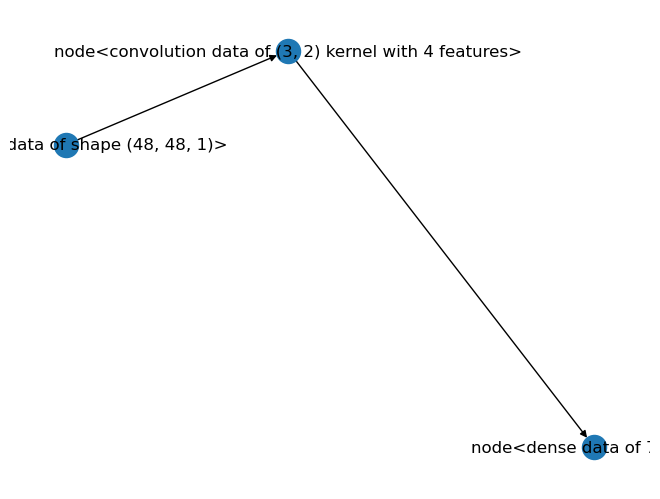

In [51]:
def test():
    input_data_node = DataNode(
        data=InputData(),
        parents=None,
        # children=set(),
    )
    convolution_data_node = None
    convolution_data_node = DataNode(
        data=ConvolutionData(kernel_size=(3,2), features=4),
        # children=set(),
    )
    # convolution_data_node.children = set()
    
    output_data_node = DataNode(
        data=DenseData(7),
        children=None,
    )
    # print(f"\n1) {convolution_data_node.children = }")
    convolution_data_node.add_parent(input_data_node)
    output_data_node.add_parent(convolution_data_node)


    print("\nwalk up")
    for node in output_data_node.walk_up():
        print(f"{node = }")
    
    input_data_node.children
    
    print("\nwalk down")
    for node in input_data_node.walk_down():
        print(f"{node = }")
        print(f"\t{node.children = }")
    
    del convolution_data_node

    print(f"{output_data_node.ancestors() = }")    
    
    print(f"{output_data_node.ancestors(input_data_node) = }")
    
    print(f"{input_data_node.lineage() = }")
    
    print(f"{input_data_node.lineage(output_data_node) = }")

    print(f"{input_data_node.lineage(output_data_node, excludee_nodes={output_data_node}) = }")

    print(f"{graph_edges_from_top_node(input_data_node) = }")
    
    draw_from_top_data_node(input_data_node)

    print(f"{input_data_node.data.layer() = }")
    output_data_node.echelon()

test()


### additive operations

In [57]:
def generate_reversible_convolution_intercalating_from_parent_node( parent_and_child_data_nodes ):
    new_convolution_data_node = DataNode(data=ConvolutionData())
    def effect(parent_and_child_data_nodes): 
        new_convolution_data_node.intercalate( parent_and_child_data_nodes )
    def reverse(parent_and_child_data_nodes):
        new_convolution_data_node.extricate( parent_and_child_data_nodes )
    return effect, reverse

In [58]:
import random

def get_one_random_parent_data_node_from_graph(top_and_bot_node):
    top_node, bot_node = top_and_bot_node
    assert top_node.children, f"top node with no children ? {a_parent}"
    candidate_parent_nodes = top_node.lineage(excludee_nodes={bot_node})
    for a_parent in candidate_parent_nodes:
        assert a_parent.children is not None, f"parent with no children ? {a_parent}"
    candidate_parent_nodes.add(top_node)
    picked_parent_node = random.choice(list(candidate_parent_nodes))
    assert picked_parent_node.children, f"picked parent node has n children ! {picked_parent_node.inspect()}"
    return picked_parent_node

def get_one_random_child_data_node_from_parent_data_node(parent_node):
    assert parent_node.children, f"node has no children {parent_node = }"
    return random.choice(list(parent_node.children))

def generate_random_reversible_intercalating_from_graph( top_and_bot_node ):
    parent_node = get_one_random_parent_data_node_from_graph(top_and_bot_node)
    assert parent_node.children, f"node has no children {parent_node = }"
    child_node = get_one_random_child_data_node_from_parent_data_node(parent_node)
    effect, reverse = generate_reversible_convolution_intercalating_from_parent_node( (parent_node, child_node) )
    return  (parent_node, child_node) , effect, reverse 

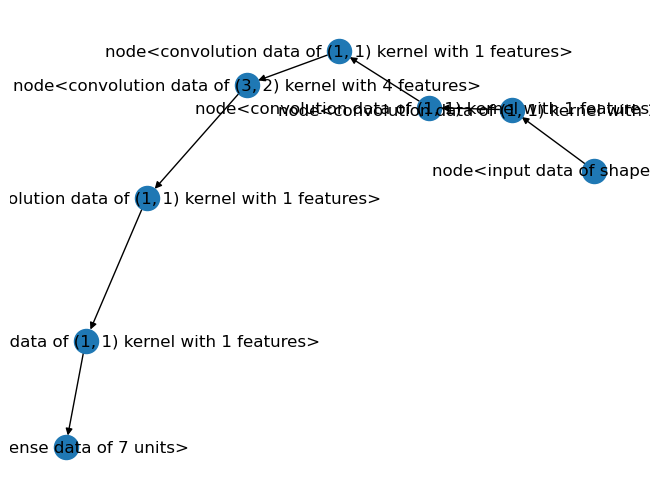

In [59]:
def test():
    input_data_node = DataNode(
        data=InputData((48,48,1)),
        parents=None,
    )
    convolution_data_node = None
    convolution_data_node = DataNode(
        data=ConvolutionData(kernel_size=(3,2), features=4),
    )    
    output_data_node = DataNode(
        data=DenseData(7),
        children=None,
    )
    convolution_data_node.add_parent(input_data_node)
    output_data_node.add_parent(convolution_data_node)
    
    for _ in range(5):
        effectee, effect, _reverse = generate_random_reversible_intercalating_from_graph( (input_data_node, output_data_node) )
        effect(effectee)

    draw_from_top_data_node(input_data_node)

test()


### transformative operations

In [61]:
def get_all_convolution_data_nodes( top_and_bot_node ):
    top_node, bot_node = top_and_bot_node
    middle_nodes = top_node.lineage(excludee_nodes={bot_node})
    middle_convolution_nodes = list(
        middle_node for middle_node in middle_nodes if isinstance(middle_node.data, ConvolutionData)
    )
    return middle_convolution_nodes
    
def widen_convolution_data_node_kernel_size(convolution_data_node):
    convolution_data_node.data = convolution_data_node.data.widened_kernel()
    return convolution_data_node

def unwiden_convolution_data_node_kernel_size(convolution_data_node):
    convolution_data_node.data = convolution_data_node.data.unwidened_kernel()
    return convolution_data_node

def heighten_convolution_data_node_kernel_size(convolution_data_node):
    convolution_data_node.data = convolution_data_node.data.heightened_kernel()
    return convolution_data_node

def unheighten_convolution_data_node_kernel_size(convolution_data_node):
    convolution_data_node.data = convolution_data_node.data.unheightened_kernel()
    return convolution_data_node

def augment_convolution_data_node_features(convolution_data_node):
    convolution_data_node.data = convolution_data_node.data.augmented_features()
    return convolution_data_node
    
def unaugment_convolution_data_node_features(convolution_data_node):
    convolution_data_node.data = convolution_data_node.data.unaugmented_features()
    return convolution_data_node

In [62]:
# randomized transformative graph operations
import random

def get_one_random_convolution_data_node_from_graph(top_and_bot_node):
    all_convolution_data_nodes = get_all_convolution_data_nodes(top_and_bot_node)
    assert all_convolution_data_nodes, f"not one conv node in the graph ? {all_convolution_data_nodes = }"
    return random.choice(list(all_convolution_data_nodes))

def generate_random_reversible_convolution_kernel_widening_from_graph( top_and_bot_node ):
    random_convolution_node = get_one_random_convolution_data_node_from_graph(top_and_bot_node)
    return (
        random_convolution_node,
        widen_convolution_data_node_kernel_size,
        unwiden_convolution_data_node_kernel_size,
    )
def generate_random_reversible_convolution_kernel_heightening_from_graph( top_and_bot_node ):
    random_convolution_node = get_one_random_convolution_data_node_from_graph(top_and_bot_node)
    return (
        random_convolution_node,
        heighten_convolution_data_node_kernel_size,
        unheighten_convolution_data_node_kernel_size,
    )

def generate_random_reversible_convolution_feature_augmentation_from_graph( top_and_bot_node ):
    random_convolution_node = get_one_random_convolution_data_node_from_graph(top_and_bot_node)
    return (
        random_convolution_node,
        augment_convolution_data_node_features,
        unaugment_convolution_data_node_features,
    )

def generate_random_reversible_convolution_augmentation_from_graph( top_and_bot_node ):
    convolution_data_node = get_one_random_convolution_data_node_from_graph(top_and_bot_node)
    return random.choice([
        generate_random_reversible_convolution_kernel_widening_from_graph,
        generate_random_reversible_convolution_kernel_heightening_from_graph,
        generate_random_reversible_convolution_feature_augmentation_from_graph,
    ])(top_and_bot_node)


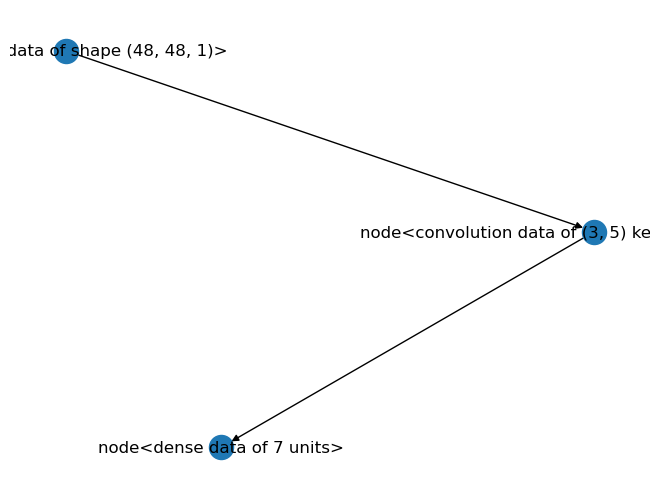

In [63]:
def test():
    input_data_node = DataNode(
        data=InputData((48,48,1)),
        parents=None,
    )
    convolution_data_node = None
    convolution_data_node = DataNode(
        data=ConvolutionData(kernel_size=(3,2), features=4),
    )    
    output_data_node = DataNode(
        data=DenseData(7),
        children=None,
    )
    convolution_data_node.add_parent(input_data_node)
    output_data_node.add_parent(convolution_data_node)
    
    for _ in range(5):
        effectee, effect, _reverse = generate_random_reversible_convolution_augmentation_from_graph( (input_data_node, output_data_node) )
        effect(effectee)

    draw_from_top_data_node(input_data_node)

test()


In [64]:
import random
def generate_random_reversible_mutation_from_graph(data_graph):
    mutation = random.choices(
        [
            generate_random_reversible_convolution_augmentation_from_graph,
            generate_random_reversible_intercalating_from_graph,
        ],
        [1,5],
        k=1,
    )[0]
    return mutation(data_graph)

In [65]:
class TemporaryMutation:
    def __init__(self, effectee, effect, reverse):
        self.effectee = effectee 
        self.effect = effect
        self.reverse = reverse

    def __enter__(self):
        self.effect(self.effectee)
        return (
            self.effectee, 
            self.effect,
            self.reverse,
        )

    def __exit__(self, exc_type, exc_value, exc_traceback):
        self.reverse(self.effectee)

def test():
    a_set = {2}
    with TemporaryMutation(a_set, lambda s: s.add(99), lambda s: s.remove(99)):
        print(f"within context {a_set = }")
    print(f"after context {a_set = }")
test()

within context a_set = {2, 99}
after context a_set = {2}


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 4)      │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 48, 48, 7)      │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43 (172.00 B)

 Trainable params: 43 (172.00 B)

 Non-trainable params: 0 (0.00 B)

input_data_node.inducted_layer = <KerasTensor shape=(None, 48, 48, 1), dtype=float32, sparse=False, name=keras_tensor_20>
input_data_node.inducted_layer = <KerasTensor shape=(None, 48, 48, 1), dtype=float32, sparse=False, name=keras_tensor_20>


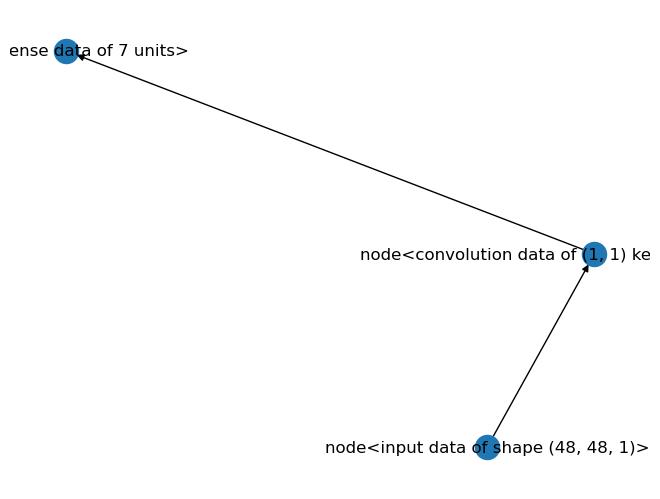

In [66]:
def test():
    input_data_node = DataNode(
        data=InputData((48,48,1)),
        parents=None,
    )
    convolution_data_node = None
    convolution_data_node = DataNode(
        data=ConvolutionData(kernel_size=(1,1), features=4),
    )    
    output_data_node = DataNode(
        data=DenseData(7),
        children=None,
    )
    convolution_data_node.add_parent(input_data_node)
    output_data_node.add_parent(convolution_data_node)

    graph = (input_data_node, output_data_node)
    draw_from_top_data_node(input_data_node)

    output_data_node.echelon()

    model = keras.Model(inputs=input_data_node.inducted_layer, outputs=output_data_node.inducted_layer)

    model.summary()

    print(f"{input_data_node.inducted_layer = }")
    print(f"{input_data_node.inducted_layer = }")

test()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 5)      │            85 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 45, 44, 1)      │            11 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 43, 44, 1)      │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 43, 42, 1)      │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 41, 42, 5)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 41, 42, 1)      │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 41, 42, 7)      │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

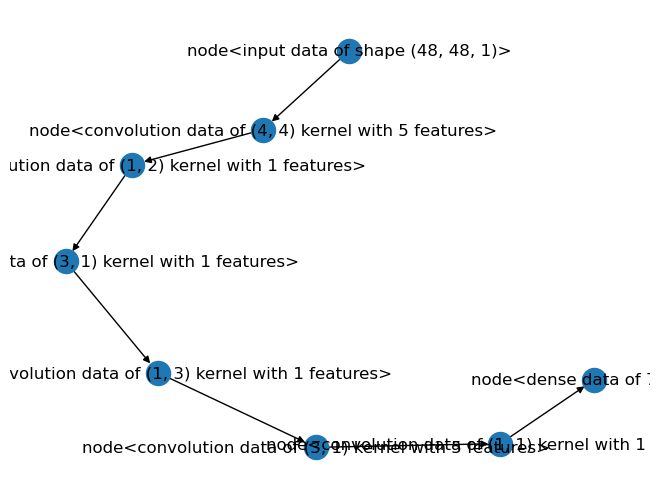

In [67]:
def test():
    input_data_node = DataNode(
        data=InputData((48,48,1)),
        parents=None,
    )
    convolution_data_node = None
    convolution_data_node = DataNode(
        data=ConvolutionData(kernel_size=(3,2), features=4),
    )    
    output_data_node = DataNode(
        data=DenseData(7),
        children=None,
    )
    convolution_data_node.add_parent(input_data_node)
    output_data_node.add_parent(convolution_data_node)


    # model = keras.Model(inputs=input_data_node.inducted_layer, outputs=output_data_node.inducted_layer)

    # model.summary()

    
    for _ in range(5):
        effectee, effect, _reverse = generate_random_reversible_intercalating_from_graph( (input_data_node, output_data_node) )
        effect(effectee)

        effectee, effect, _reverse = generate_random_reversible_convolution_augmentation_from_graph( (input_data_node, output_data_node) )
        effect(effectee)
        effectee, effect, _reverse = generate_random_reversible_convolution_augmentation_from_graph( (input_data_node, output_data_node) )
        effect(effectee)
        effectee, effect, _reverse = generate_random_reversible_convolution_augmentation_from_graph( (input_data_node, output_data_node) )
        effect(effectee)

    draw_from_top_data_node(input_data_node)


    output_data_node.echelon()

    model = keras.Model(inputs=input_data_node.inducted_layer, outputs=output_data_node.inducted_layer)

    model.summary()


test()


# training early-stop-callback  
*we gonna generate a lot of models and training and ditch it so let's make as minimal as possible*

In [68]:
# functional helper functions, framework agnostic

def stop_when_plateau_from_values(values, resolution=0.01):
    # print(f"{values = }")
    if len(values) < 2:
        return False
    # print(f"{[values[i]*(1+resolution) > values[i+1] for i in range(len(values)-1)] = }")
    # print(f"{[values[i]*(1-resolution) < values[i+1] for i in range(len(values)-1)] = }")
    return all( 
        ( values[i]*(1+resolution) > values[i+1]) and ( values[i]*(1-resolution) < values[i+1])
        for i in range(len(values)-1)
    )
def test():
    assert not stop_when_plateau_from_values([1,2,4])
    assert stop_when_plateau_from_values([1,1,1])
    assert stop_when_plateau_from_values([1,0.9999,1.0001])
test()

def stop_from_losses(losses, diminution_threshold_ratio=0.99):
    if len(losses) < 2: # assumed to be the 3 last loss values
        return False
    # print(f"{[losses[i] < losses[i+1] for i in range(len(losses)-1)] = }")
    # print(f"{[losses[i]*diminution_threshold_ratio < losses[i+1] for i in range(len(losses)-1)] = }")
    return all( # if loss did not diminish for 3 epochs -> should stop
        # losses[i] < losses[i+1]
        losses[i]*diminution_threshold_ratio < losses[i+1]
        for i in range(len(losses)-1)
    )

def stop_from_accuracies(accuracies, increase_threshold_ratio=1.01, target_accuracy=0.95):
    if len(accuracies) < 2: # assumed to be the 3 last loss values
        return False
    # print(f"{[accuracies[i] > accuracies[i+1] for i in range(len(accuracies)-1)] = }")
    # print(f"{[accuracies[i]*increase_threshold_ratio > accuracies[i+1] for i in range(len(accuracies)-1)] = }")
    return all( 
    # return (accuracies[-1] > target_accuracy) or all( 
        accuracies[i]*increase_threshold_ratio > accuracies[i+1]
        # accuracies[i] > accuracies[i+1]
        for i in range(len(accuracies)-1)
    )
# if loss did not diminish for 3 epochs -> should stop
def accummulation_from_new_value_and_accumulation(new_value, accummulation=[], length=3):
    if len(accummulation) < length:
        return accummulation + [new_value]
    return accummulation[1:] + [new_value]
    
def test():
    losses = []
    stop = False
    for loss in [4.0, p:=2, p:=(p*0.98), p:=(p*0.98), p:=(p*0.999), p:=(p*0.999), p:=(p*0.999)]:
        assert not stop
        stop = stop_from_losses(losses)
        losses = accummulation_from_new_value_and_accumulation(loss,losses)
        # print(f"{stop = } \t{losses = }")
    assert stop 
    accuracies = []
    stop = False
    for accuracy in [0,0.2,p:=0.5, p:=(p*2),p:=(p*1.1),p:=(p*1.1),p:=(p*1.1),p:=(p*1.001),p:=(p*1.001),p:=(p*1.001)]:
        assert not stop
        stop = stop_from_accuracies(accuracies)
        accuracies = accummulation_from_new_value_and_accumulation(accuracy,accuracies)
        # print(f"{stop = } \t{accuracies = }")
    assert stop 
test()

In [69]:
[[]]*3

[[], [], []]

In [70]:
# keras early stop implementation

def is_iterable(thing):
    try:
        iter(thing)
        return True
    except:
        return False

class EarlyStopCallback(keras.callbacks.Callback):
    def __init__(
        self, 
        metrics='accuracy',
        accumulators=accummulation_from_new_value_and_accumulation,
        stops=stop_when_plateau_from_values,
    ):
        super().__init__()
        lengths = [ len(stuff) for stuff in [metrics, accumulators, stops] if is_iterable(stuff) ]
        max_length = 1 if not lengths else max(lengths)
        metrics = metrics if is_iterable(metrics) else [metrics]*max_length
        accumulators = accumulators if is_iterable(accumulators) else [accumulators]*max_length
        stops = stops if is_iterable(stops) else [stops]*max_length
        accumulations = [[]]*max_length
        # print(f"{stops = }")
        # print(f"{accumulators = }")
        # print(f"{accumulations = }")
        self.metrics = metrics # what log's field we care about
        self.accumulators = accumulators # how we update state for each metric
        self.stops = stops # return True if values require/allow early stop
        self.accumulations = accumulations

    def on_epoch_end(self, epoch, logs=None):
        # print(f"{self.stops = }")
        # print(f"{self.accumulations = }")
        for i, metric  in enumerate(self.metrics):
            value = logs.get(metric)
            self.accumulations[i] = self.accumulators[i](value, self.accumulations[i])
            self.model.stop_training &= self.stops[i](self.accumulations[i])

def test():
    early_stop_callback = EarlyStopCallback(
        metrics=['loss','accuracy'],
        accumulators=accummulation_from_new_value_and_accumulation,
        stops=[stop_from_losses, stop_from_accuracies],        
    )
test()

# helper functions 
- (graph data) -> keras model
- (keras model, inputs, expected output) -> metrics
- (graph data, input, expected output) -> metrics

In [71]:
def model_from_data_graph(data_graph):
    input_data_node, output_data_node = data_graph
    output_data_node.echelon()
    keras_model = keras.Model(inputs=input_data_node.inducted_layer, outputs=output_data_node.inducted_layer)
    return keras_model
    
def scores_from_data_graph(
    data_graph, 
    train_set_generator, 
    validation_set_generator=None, 
    epochs=25,
    callbacks=None,
    verbose=0,
):
    callbacks = [EarlyStopCallback(
        metrics=['loss','accuracy'],
        accumulators=accummulation_from_new_value_and_accumulation,
        stops=[stop_from_losses, stop_from_accuracies],        
    )] if callbacks is None else callbacks
    model=model_from_data_graph(data_graph) 
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        x=train_set_generator,
        validation_data=validation_set_generator,
        epochs=25, #epoch,
        # steps_per_epochs=len(train_set_generator),
        # batch_size=len(train_set_generator),
        # validation_steps=len(validation_set_generator) if validation_set_generator is not None else None,
        callbacks=callbacks,
        verbose=verbose,
    )
    score_by_metric = { metric: values[-1] for metric, values in history.history.items() }
    return score_by_metric


# helper functions
- (data frame) -> input/output generator  
*the way keras like it*  
*according to facial emotion recognition context*

In [72]:
def image_and_label_generator_from_data_frame(
    data_frame, 
    image_file_path_column_name, 
    label_column_name,
    color_mode,
    class_mode,
    rescale,
):
    train_datagen = keras.src.legacy.preprocessing.image.ImageDataGenerator(rescale=rescale)
    input_generator = train_datagen.flow_from_dataframe(
        dataframe=data_frame,
        x_col=image_file_path_column_name,
        y_col=label_column_name,
        target_size=(48, 48),
        color_mode=color_mode,
        class_mode=class_mode
    )
    return input_generator

def fixing_fer_parameters_of_image_and_label_generator_from_data_frame_from_fer_constants(
    image_file_path_column_name='image',
    label_column_name='emotion',
    target_size=(48, 48),
    color_mode='grayscale',
 # 'raw' if label col is numerical dtype
    # class_mode='raw',
 # 'categorical' if label col is string dtype
    # class_mode='categorical',
    rescale=1./255,
):
    def fixed_fer_parameters_image_and_label_generator_from_data_frame(data_frame):
        class_mode = 'categorical' if data_frame[label_column_name].dtype == pandas.StringDtype() else 'raw'
        return image_and_label_generator_from_data_frame(
            data_frame=data_frame, 
            image_file_path_column_name=image_file_path_column_name, 
            label_column_name=label_column_name,
            color_mode=color_mode,
            class_mode=class_mode,
            rescale=rescale,
        )
    return fixed_fer_parameters_image_and_label_generator_from_data_frame

fer_image_and_label_generator_from_data_frame = (
    fixing_fer_parameters_of_image_and_label_generator_from_data_frame_from_fer_constants()
)

In [73]:
sampled_train_set_generator = fer_image_and_label_generator_from_data_frame(sampled_train_data_frame)

Found 280 validated image filenames belonging to 7 classes.


In [74]:
validate_set_generator = fer_image_and_label_generator_from_data_frame(validate_data_frame)

Found 3589 validated image filenames belonging to 7 classes.


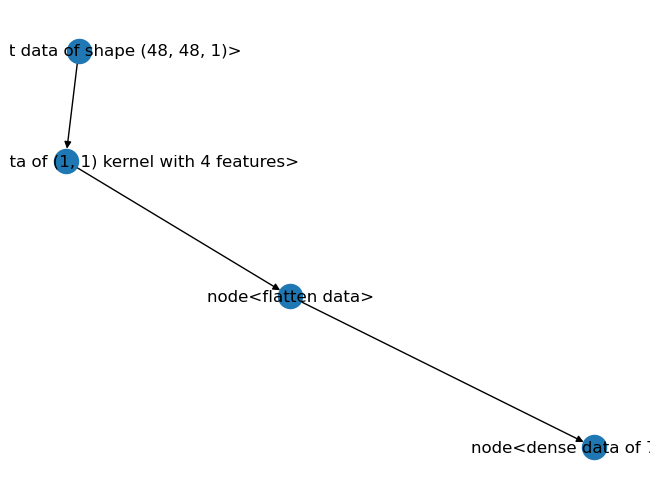

In [75]:
def test():
    input_data_node = DataNode(
        data=InputData((48,48,1)),
        parents=None,
    )
    convolution_data_node = None
    convolution_data_node = DataNode(
        data=ConvolutionData(kernel_size=(1,1), features=4),
    )    
    flatten_data_node = DataNode(
        data=FlattenData(),
    )
    output_data_node = DataNode(
        data=DenseData(units=7),
        children=None,
    )
    convolution_data_node.add_parent(input_data_node)
    flatten_data_node.add_parent(convolution_data_node)
    output_data_node.add_parent(flatten_data_node)

    # for _ in range(2):
    #     additive_effectee, additive_effect, _reverse = generate_random_reversible_intercalating_from_graph( (input_data_node, flatten_data_node) )
    #     additive_effect(additive_effectee)
    for _ in range(20):
        trasformative_effectee, transformative_effect, reverse = generate_random_reversible_convolution_augmentation_from_graph( (input_data_node, output_data_node) )
        transformative_effect(trasformative_effectee)
        reverse(trasformative_effectee)
        
    draw_from_top_data_node(input_data_node)

    data_graph = input_data_node, output_data_node

    return data_graph

data_graph = test()

In [76]:
def test(data_graph, train_set_generator):

    model = model_from_data_graph(data_graph)
    model.summary()
    score_from_model_inputs_and_outputs
    
    score_by_metric = score_from_model_inputs_and_outputs(model, train_set_generator)
    print(f"{score_by_metric = }")
    # model = keras.Model(inputs=input_data_node.inducted_layer, outputs=output_data_node.inducted_layer)

    # model.summary()

test(data_graph, sampled_train_set_generator)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 4)      │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │        64,519 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,527 (252.06 KB)

 Trainable params: 64,527 (252.06 KB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'score_from_model_inputs_and_outputs' is not defined

### training behavior
note, log retuned after each epoch during fitting is like :
```
{
    'loss': 0.6932,
    'accuracy': 0.5121,
# if validation set is given:
    'val_loss': 0.6930, 
    'val_accuracy': 0.5190
}
```

# define the model architecture generation/selection/evolution loop

In [77]:
# generate graph data from increasing quantity of data and stop
# when platea (either used all data or plateau accuracy)
def generate_data_graph_from_all_inputs(all_train_set_data_frame, all_validate_set_data_frame, data_graph=None):
    data_graph = minimal_fer_data_graph() if data_graph is None else data_graph
    scores = []
    metrics = []
    plateau = False
    sampling = 1
    while not plateau:
        sample_train_data_set = sampled_data_frame(
                    data_frame=all_train_set_data_frame,
                    sampling_quantity=sampling,
                    to_be_preserved_column_names=['emotion'],
                )
        sample_validate_data_set = sampled_data_frame(
                    data_frame=all_validate_set_data_frame,
                    sampling_quantity=sampling,
                    to_be_preserved_column_names=['emotion'],
                )
        train_image_generator = fer_image_and_label_generator_from_data_frame(sample_train_data_set)
        validate_image_generator = fer_image_and_label_generator_from_data_frame(sample_validate_data_set)
        data_graph = generate_satisfying_data_graph_from_the_given_data_samples(
            train_image_generator=train_image_generator,
            train_labels = train_labels,
            
            validate_image_generator=validate_image_generator,
            validate_labels = validate_labels,
            
        )
        plateau = is_plateau_from_scores(scores)
        sampling *= 2
    return data_graph
        

In [78]:
# run several random mutation and keep the best according to the given metric
def one_mutation_cycle(
    train_set_generator,
    data_graph=None, 
    validate_set_generator=None,
    metric='val_accuracy', # | 'val_accuracy'
    initial_score=None,
    mutations_per_cycle=3,
): #-> accuracy after (best) mutation
    data_graph = minimal_fer_data_graph() if data_graph is None else data_graph
    if initial_score is None:
        initial_score = scores_from_data_graph(
            data_graph, train_set_generator, validate_set_generator
        )[metric]
    print(f"{initial_score = }")
    # below is all what we keep track for one mutation cycle -> so we can keep only the best
    mutatees = [None]*mutations_per_cycle
    mutations = [None]*mutations_per_cycle
    reverse_mutations = [None]*mutations_per_cycle
    mutations_scores = [None]*mutations_per_cycle
    if not get_all_convolution_data_nodes(data_graph): # so we do not try to augment zero conv layer at really first loop
        effectee, effect, reverse = generate_random_reversible_intercalating_from_graph( data_graph )
        effect(effectee)
    for mutation_index in range(mutations_per_cycle):
        print()
        print(f"{mutation_index = }")
        print()
        if mutation_index == 0: # so we do not try to augment zero conv layer at really first loop
            effectee, effect, reverse = generate_random_reversible_intercalating_from_graph( data_graph )
        if mutation_index > 0:
            effectee, effect, reverse = generate_random_reversible_convolution_augmentation_from_graph( data_graph )

        # effectee, effect, reverse = generate_random_reversible_mutation_from_graph( data_graph )
        # effectee, effect, reverse = generate_random_reversible_intercalating_from_graph( data_graph )
        # effectee, effect, reverse = generate_random_reversible_convolution_augmentation_from_graph( data_graph )
        # print(f"{effectee = }")
        # print(f"{effect = }")
        # with TemporaryMutation(effectee, effect, reverse):
        mutatees[mutation_index] = effectee
        mutations[mutation_index] = effect
        reverse_mutations[mutation_index] = reverse
        #
        effect(effectee)
        mutation_scores = scores_from_data_graph(data_graph, train_set_generator, validate_set_generator)
        reverse(effectee)
        #
        mutations_scores[mutation_index] = mutation_scores
    # find best mutation and reapply it
    # print(f"{[scores[metric] for scores in mutations_scores] = }")
    # print(f"{mutatees = }")
    # print()
    # print(f"{mutations = }")
    # print()
    # print(f"{reverse_mutations = }")
    # print()
    # print(f"{mutations_scores = }")
    best_mutation_score = None
    best_mutation_index = None
    for mutation_index, mutation_scores in enumerate(mutations_scores):
        # print(f"{mutation_index = }")
        # print(f"{mutation_scores = }")
        # print(f"{mutations_scores[mutation_index] = }")
        score = mutation_scores[metric]
        if best_mutation_score is None or score > best_mutation_score:
            best_mutation_index = mutation_index 
            best_mutation_score = score
    if initial_score > best_mutation_score:
        print(f"we did not improve sh*** ! {initial_score = } {best_mutation_score = }")
        return data_graph, initial_score
    else:
        print(f"found {best_mutation_score = } with {best_mutation_index = }")
        # select best
        best_effectee, best_effect = mutatees[best_mutation_index], mutations[best_mutation_index]
        # apply best
        print(f"we apply {best_effect = } on {best_effectee = }")
        best_effect(best_effectee)
        return data_graph, mutations_scores[best_mutation_index]

op_data_node = node<7 categorical outputs data>
op_data_node = node<7 categorical outputs data>


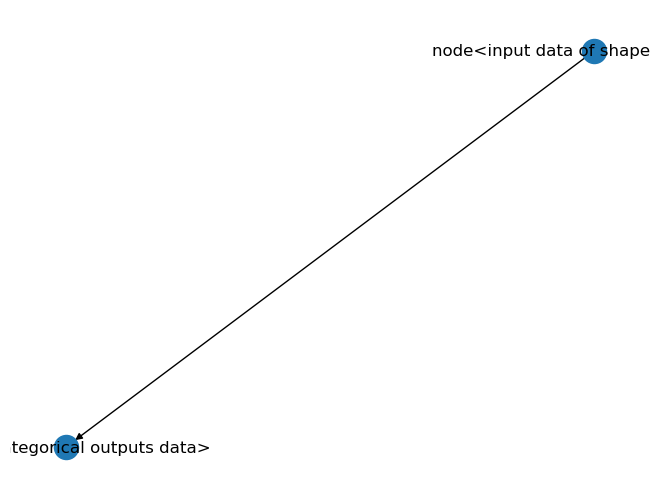

In [79]:
data_graph = minimal_fer_data_graph()
draw_from_top_data_node(data_graph[0])

In [80]:
train_set_generator = fer_image_and_label_generator_from_data_frame(train_data_frame)

Found 28709 validated image filenames belonging to 7 classes.


In [81]:
def test(
    data_graph, 
    train_image_generator
):
    
    data_graph, mutated_score= one_mutation_cycle(
        data_graph=data_graph,
        train_set_generator=train_image_generator,
        validate_set_generator=validate_set_generator,
        metric='val_accuracy', # | 'val_accuracy'
    )
    print(f"{mutated_score = }")
for i in range(20):
    test(data_graph,train_set_generator)

/home/wam/kood/emotions-detector/facial_emotion_recognition/envs/emotion/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


KeyboardInterrupt: 

In [ ]:
draw_from_top_data_node(data_graph[0])

In [ ]:
# from on sample of train and val set
    # find "best" (| plateau | max) graph architecture  and metrics
# redo with augmented data set
    # get "best architecture" and metrics
# if bestness-metric/sampling-size plateau
    # test on test set
        # good enough ?
            # voila the data_graph !
        # not good enough ?
            # heuuu...